# Solving differential equations numerically
___

Differential equations are a standard mathematical model used to understand dynamical systems. In general, these, or any, models aren't necessarily tractable. This notebook aims to address how can we study differential equations by integrating them numerically and plotting the results. In particular, we study exponential growth and the SIR model.

# Import modules

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

plt.style.use('custom.mplstyle')
%config InlineBackend.figure_format = 'retina'

# The Euler method
___

A simple, first-order algorithm for solving ordinary differential equations given some initial value is the [Euler method](https://en.wikipedia.org/wiki/Euler_method).

Perhaps the simplest example of a differential equation is that for exponential growth.

$$
\frac{dN}{dt} = rN(t)
$$

where $r$ is some constant growth rate and $N(t)$ represents the size of a population at time $t$. We can solve this analytically by separating the variables and integrating on paper. Numerically, we can solve for $N(t)$ with a first-order Taylor expansion. Using the first-order ordinary differential equation above, we have

$$
\begin{align*}
N(t + \Delta t) &= N(t) + \frac{dN}{dt}(t) \Delta t + O(\Delta t^2)\\
&\approx N(t) + r N(t) \Delta t
\end{align*}
$$

Suppose $N(0) = 2$ and $r = 1$. Letting $\Delta t = 0.1$, $N$ changes by

$$
\Delta N(0) = rN(0) \Delta t = (1)(2)(0.1) = 0.2
$$

where $\Delta N(0)$ means the change in $\Delta N$ at $t=0$. We can continue evolving $N(t)$ indefinitely. Though we've shown we can perform Euler's method by hand, if we're to evolve $N(t)$ for long times or use a small $\Delta t$ to get a better approximation, it's better to use a computer.

Notably, 

$$
N(t + \Delta t) = N(t) + \frac{dN(t)}{dt} \Delta t + O(\Delta t^2)
$$

This means that the error in our approximation of $N(t)$ scales with $\Delta t^2$. $\Delta t$ is something we're free to choose. Therefore, it's best to choose a $\Delta t$ that is small. In particular, it must be small enough such that at most only one event occurs within an interval between $t$ and $t + \Delta t$. Take the evolution of bacterial cells as an example. If we are integrating exponential growth of this process, we shouldn't take $\Delta t$ to be larger than the time it takes for a cell to divide. This is stated formally as the [Courant-Friedrichs-Lewy condition](https://en.wikipedia.org/wiki/Courant%E2%80%93Friedrichs%E2%80%93Lewy_condition). On the other hand, choosing $\Delta t$ too small (e.g. $10^{-16}$) can ensue in unnecessarily long computational times and possibly numerical inaccuracies. All in all, Euler's method is simple and powerful, but we must be mindful of our choice for $\Delta t$.

# Exponential growth
___


### Write a function the performs numerical integration for exponential growth.

It should have as its parameters:
- `n0`, the initial population size
- `r`, the growth rate
- `T`, the total amount of time over which we want to evolve $N(t)$
- `dt`, the size of our time step

It should return:
- `times`, a numpy array containing the times $\vec{t} = \{0, \Delta t, 2 \Delta t, \ldots \}$ at which $N(t)$ was evaluated 
- `n`, a numpy array containing the values of $\vec{N} = \{N(0), N(\Delta t), N(2\Delta t), \ldots\}$

In [26]:
def euler_exponential(n0, r, T, dt):
    """
    Compute the times at which N(t) will be evaluated using
    T, dt, and np.arange. times should be in [0, T], i.e.,
    including T. For the moment, pretend T / dt is an integer.
    """
    times = np.arange(0, T + dt, dt)
    
    # Treating T as a hard upper bound, trim off any times
    # which are greater than T. Times are trimmed when
    # dt does not go into T nicely, e.g., T = 10, dt = 0.7.
    times = times[times <= T]

    # Save the length of times as num_steps.
    num_steps = len(times)
    
    # Initialize a numpy array of zeros to store
    # the values of N(t).
    n = np.zeros(num_steps)
    
    """
    Set the zeroth entry of n to be n0.
    """
    n[0] = n0
    
    for t in range(0, num_steps - 1):
        """
        Compute the value of n[t + 1] using the first-order
        Taylor approximation, r, dt, and the value of n[t].
        """
        n[t + 1] = n[t] * (1 + r * dt)
        
    return times, n

Let $N(0) = 10$, $r = 1 $(min$^{-1})$, $T = 100$ (min). Try out the Euler method using $\Delta t \in [10^{-2}, 10^{-1}, 1, 10]$.

Using a semi-log scale for one axes object and a linear scale on another axes object, plot the results of each $\Delta t$ as a scatter with each scatter associated with a particular $\Delta t$ having a different color. Set the size of the markers in the scatter plot to 5: `s=5`. Plot the analytic function as a black solid line. Display a legend associating each plotting object with its label.

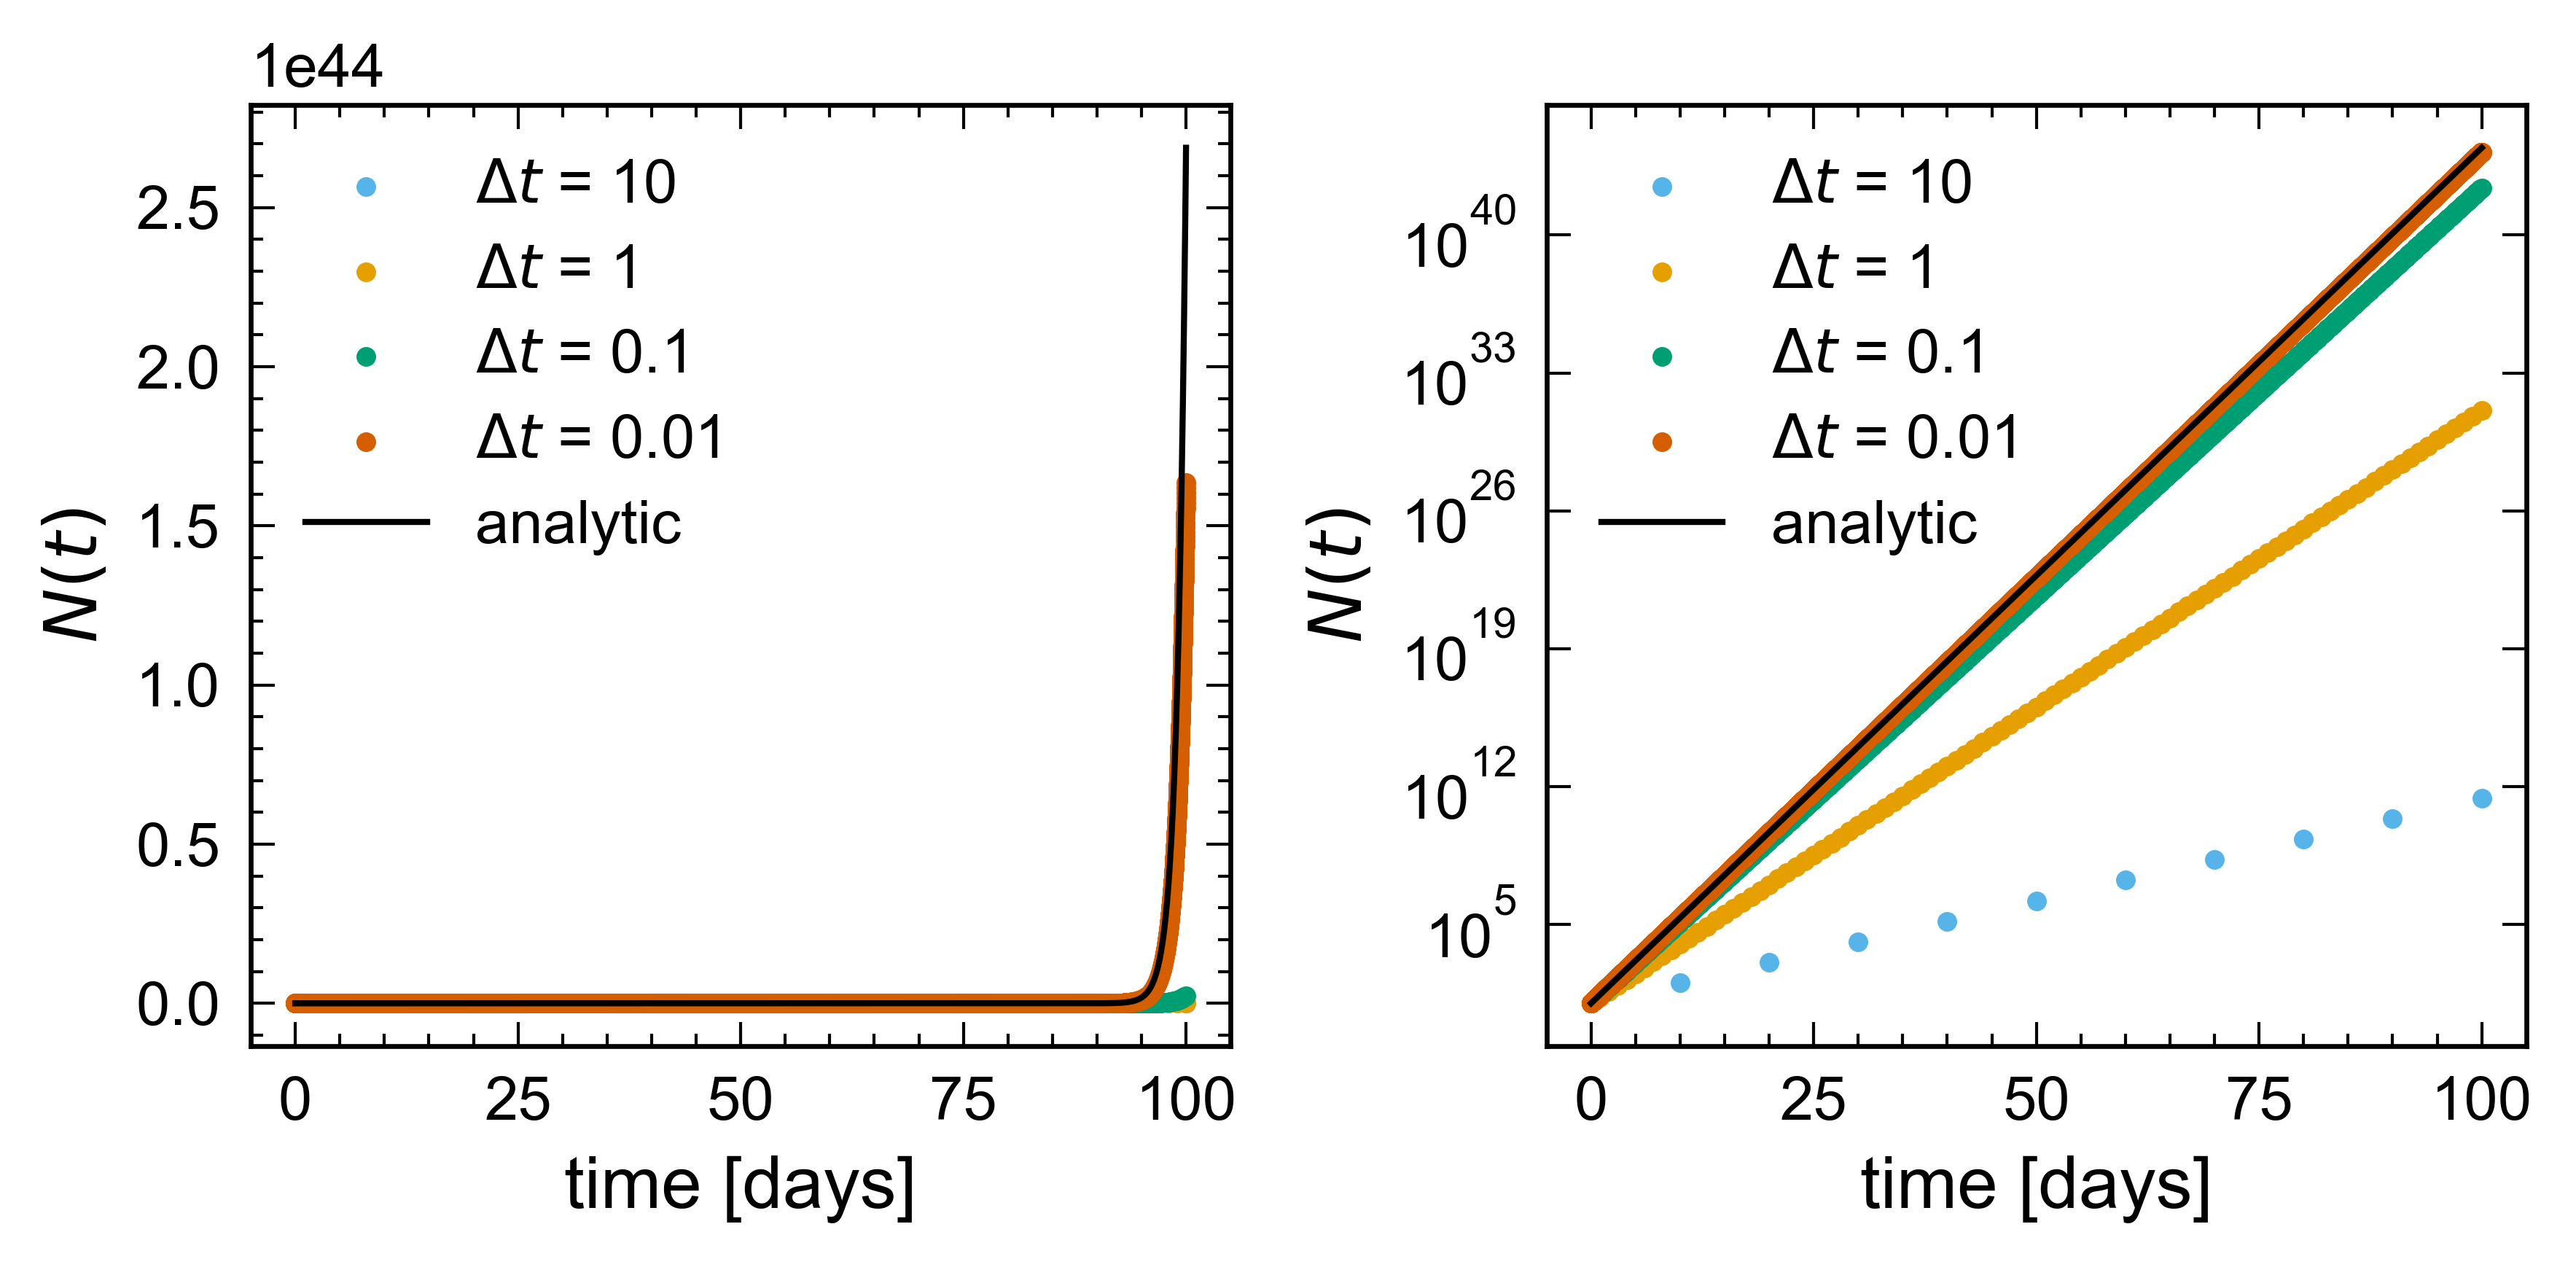

In [33]:
N0 = 10
r = 1
T = 100
dts = 10.0**np.arange(-2, 2)[::-1]

results = []
for dt in dts:
    results.append(euler_exponential(N0, r, T, dt))

fig, axes = plt.subplots(nrows=1, ncols=2, dpi=300, figsize=(6,3))
for scale, ax in zip(['linear', 'log'], axes):
    for idx, (times, pop) in enumerate(results):
        ax.scatter(times, pop, s=5, label=f'$\Delta t$ = {dts[idx]:.2g}')

    ax.plot(times, N0*np.exp(r*times), color='black', label='analytic')
    ax.set_xlabel('time [days]')
    ax.set_ylabel('$N(t)$')
    ax.set_yscale(scale)
    ax.legend()
    
plt.tight_layout()
plt.show()

Now let $N(0) = 10$, $r = 0.01$ (min$^{-1})$, $T = 100$ (min). Again, try out the Euler method using $\Delta t \in [10^{-2}, 10^{-1}, 1, 10]$.

Using a semi-log scale for one axes object and a linear scale on another axes object, plot the results of each $\Delta t$ as a scatter with each scatter associated with a particular $\Delta t$ having a different color. Set the size of the markers in the scatter plot to 5: `s=5`. Plot the analytic function as a black solid line. Display a legend associating each plotting object with its label.

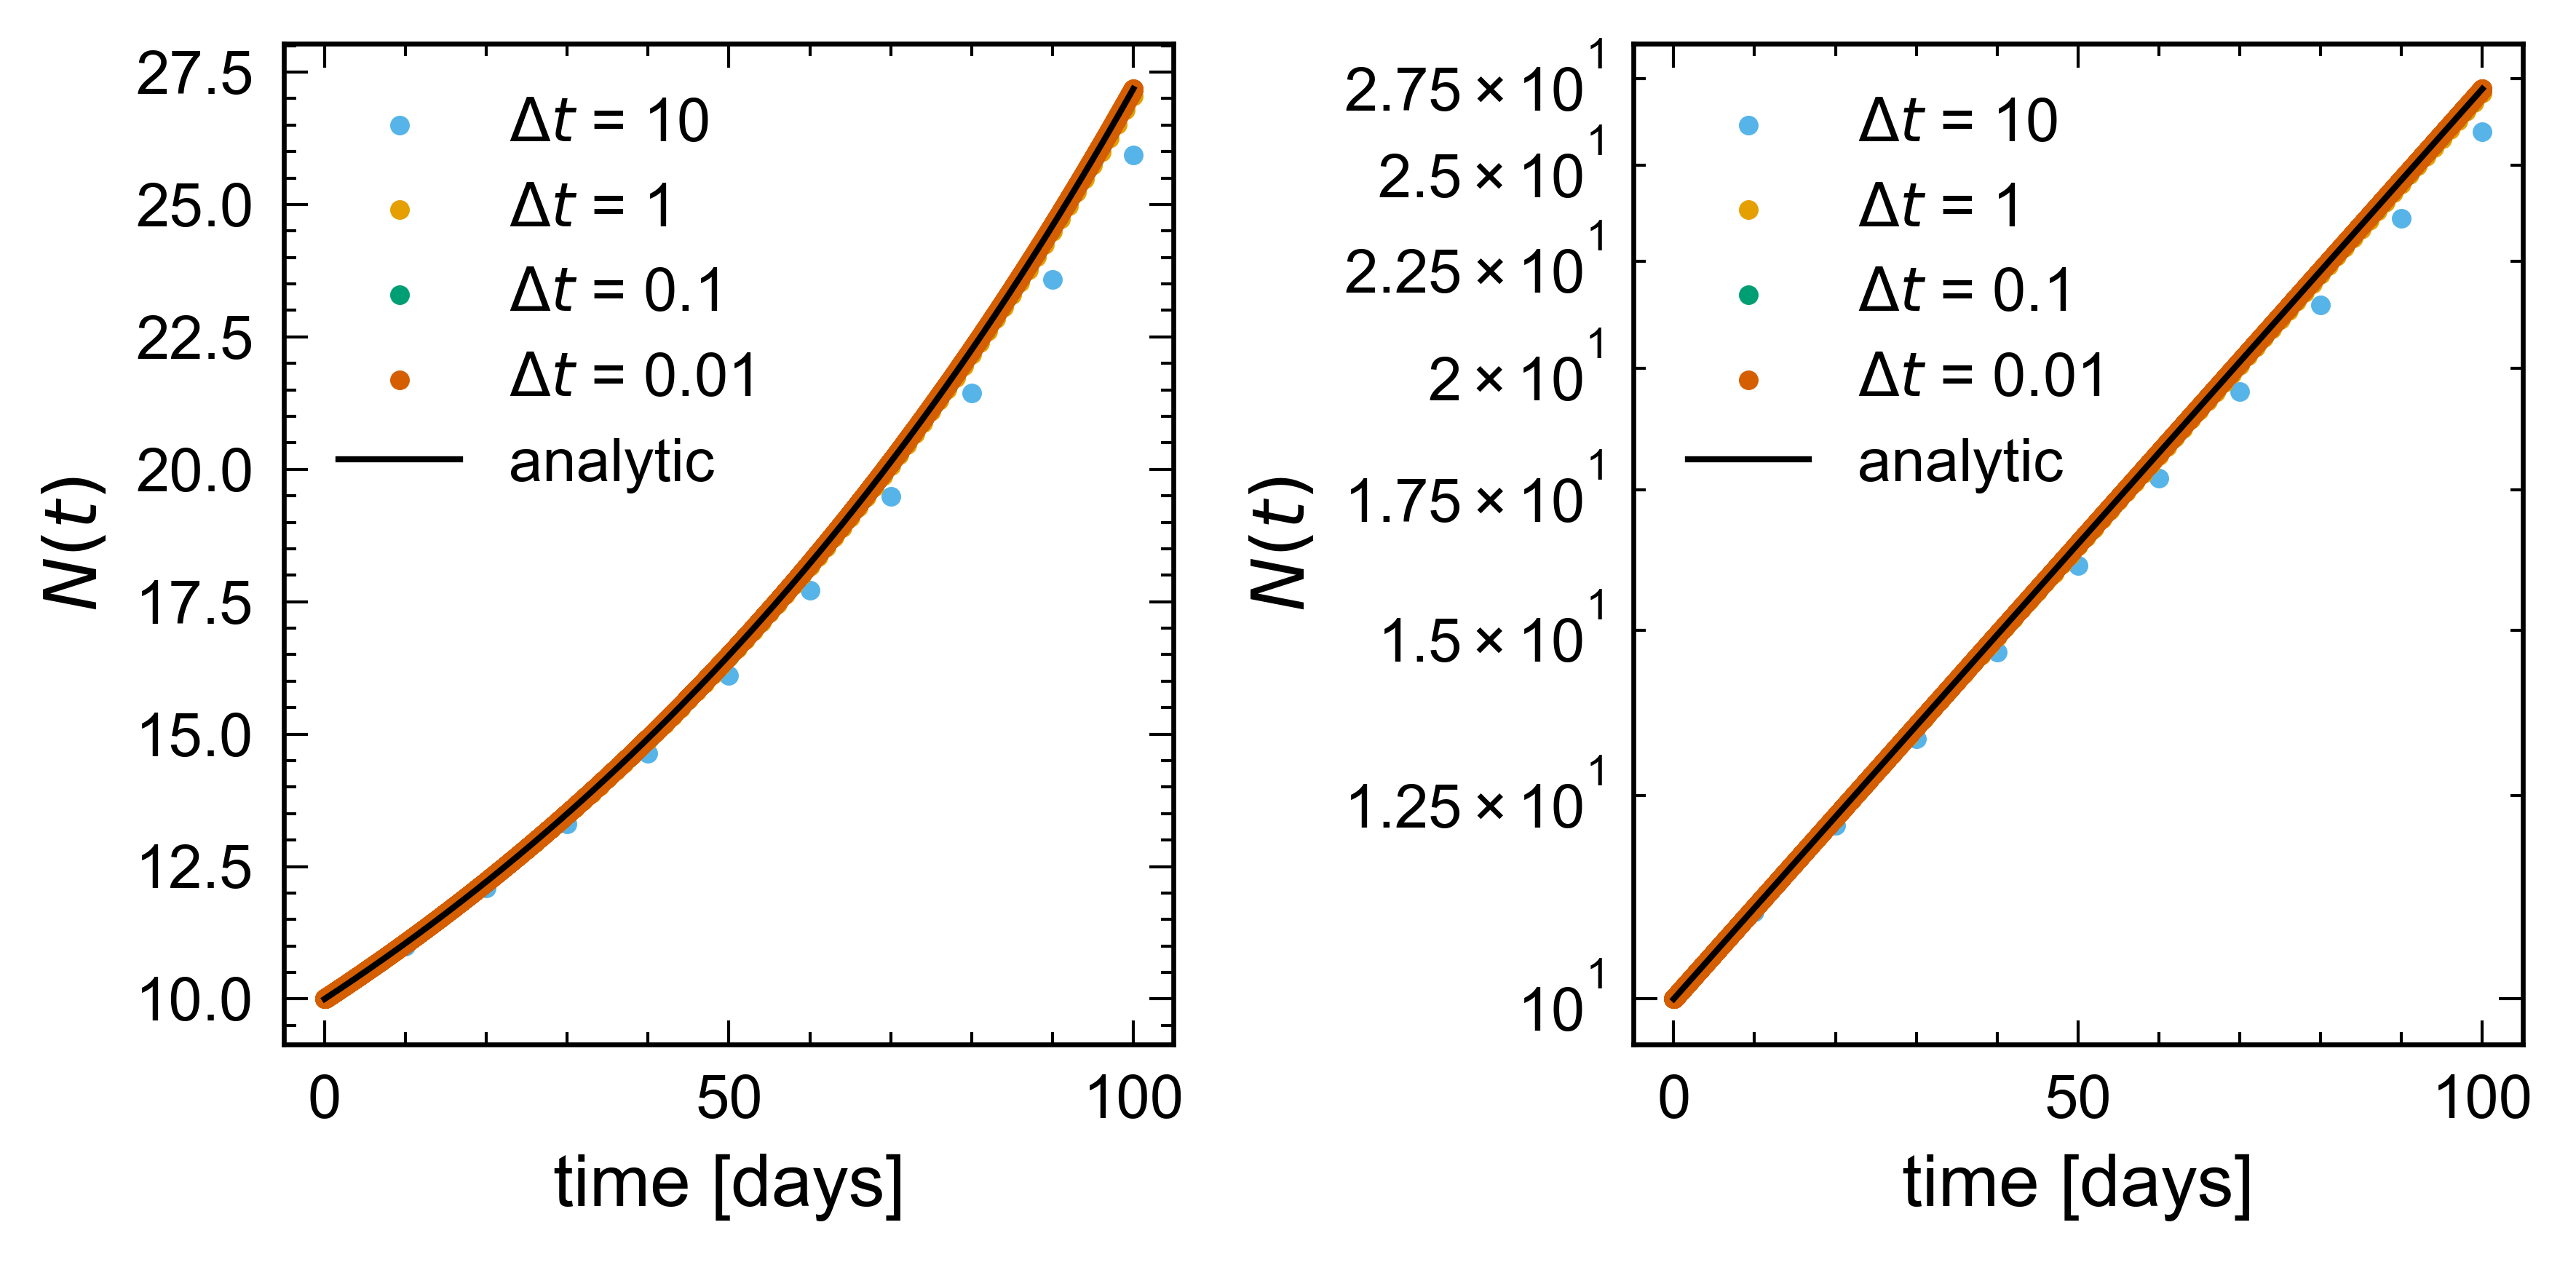

In [34]:
N0 = 10
r = 0.01
T = 100
dts = 10.0**np.arange(-2, 2)[::-1]

results = []
for dt in dts:
    results.append(euler_exponential(N0, r, T, dt))

fig, axes = plt.subplots(nrows=1, ncols=2, dpi=300, figsize=(6,3))
for scale, ax in zip(['linear', 'log'], axes):
    for idx, (times, pop) in enumerate(results):
        ax.scatter(times, pop, s=5, label=f'$\Delta t$ = {dts[idx]:.2g}')

    ax.plot(times, N0*np.exp(r*times), color='black', label='analytic')
    ax.set_xlabel('time [days]')
    ax.set_ylabel('$N(t)$')
    ax.set_yscale(scale)
    ax.legend()
    
plt.tight_layout()
plt.show()

By choosing a smaller $r$, $N(t)$ grows slower. We see that a larger $\Delta t$ can be accurate for this choice of $r$. This is a demonstration of the Courant-Friedrichs-Lewy condition. For the above, $r \Delta t = (1)(10) = 10$ (10 events occurs per interval) whereas here $r \Delta t = (0.01)(10) = 0.1$ (0.1 events occur per interval).

We see that choosing a smaller $\Delta t$ gives a more accurate solution overall. Additionally, the characteristic time $r^{-1}$ sets how correct a choice of $\Delta t$ can be. If $\Delta t > r^{-1}$, our approximation misses events of growth and errors in our numerical approximation accumulate.

# Susceptible-Infected-Recovered (SIR) models
___

[SIR models](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIR_model_without_vital_dynamics) describe the spread of a pathogen in a population. The SIR model breaks down the overall population into three subsets: 
* the susceptible population $S$, which consists of folks who haven't been infected yet and can be infected
* the infected population $I$, which can recover from the infection or infect the susceptible population
* the recovered population $R$, which assumedly can't be reinfected. Note that sometimes this group is referred to as "removed," which could also include death by infection.


The system of differential equations for this model are:

$$
\begin{align*}
\frac{dS(t)}{dt} &= -\beta S(t) I(t) \\
\frac{dI(t)}{dt} &= \beta S(t) I(t) - \nu I(t) \\
\frac{dR(t)}{dt} &= \nu I(t)
\end{align*}
$$

where $\beta > 0$ is the rate at which a susceptible person meeting an infected individual becomes infected. Note that such encounters occur at rate $S(t) I(t)$. $\nu > 0$ is the rate at which infectious people recover. Here, we are letting $S$, $I$, and $R$ be the **fractions of the population** which are susceptible, infectious, or recovered, respectively: $S(t) + I(t) + R(t) = 1$. Because of this relationship, we consider the equation for $dR(t)/dt$ to be superfluous, as at each time point $R(t) = 1- S(t) -I(t)$. Additionally, by modeling the fractions of the overall population, we don't need to worry about the size of the total population, making our lives a bit easier.

The ratio of $\beta$ and $\nu$ constitutes what is called $R_0$, the basic reproduction number:

$$
R_0 = \frac{\beta}{\nu}
$$

$R_0$ describes how many people an infectious person infects on average.

# Euler method and the SIR model
___

Because $R(t) = 1 - S(t) - I(t)$, we need only solve for the evolution of $S(t)$ and $I(t)$. As before,

$$
\begin{align*}
S(t + \Delta t) &= S(t) + \frac{dS(t)}{dt} \Delta t + O(\Delta t^2) \\
I(t + \Delta t) &= I(t) + \frac{dI(t)}{dt} \Delta t + O(\Delta t^2)
\end{align*}
$$

Applying the approximation and plugging in the values for the derivatives, we have

$$
\begin{align*}
S(t + \Delta t) &\approx S(t) - \beta S(t) I(t) \Delta t \\
I(t + \Delta t) &\approx I(t) + \beta S(t) I(t) \Delta t - \nu I(t) \Delta t
\end{align*}
$$


### Write a function that performs numerical integration for the SIR model.

It should have as its parameters:
- `s0`, the initial fraction of the population that is susceptible
- `i0`, the initial fraction of the population that is infected
- `reprod_num`, the basic reproduction number
- `nu`, the average rate of recovery
- `T`, the total amount of time over which we want to evolve $S(t)$ and $I(t)$
- `dt`, the size of our time step

It should return:
- `times`, a numpy array containing the times $\vec{t} = \{0, \Delta t, 2 \Delta t, \ldots \}$ at which $S(t)$ and $I(t)$ were evaluated
- `s`, a numpy array containing the values of $\vec{S} = \{S(0), S(\Delta t), S(2\Delta t), \ldots\}$
- `i`, a numpy array containing the values of $\vec{I} = \{I(0), I(\Delta t), I(2\Delta t), \ldots\}$

In [5]:
def euler_sir(s0, i0, reprod_num, nu, T, dt):
    # Compute the times in [0, T] at which S(t)
    # and I(t) will be evaluated.
    times = np.arange(0, T + dt, dt)
    times = times[times <= T]
    
    # Save the length of times as num_steps.
    num_steps = len(times)
    
    # Initialize numpy arrays with zeros to store
    # the values of S(t) and I(t).
    s = np.zeros(shape=num_steps)
    i = np.zeros(shape=num_steps)
    
    """
    Set the zeroth entry of s to be s0.
    """
    s[0] = s0
    
    """
    Set the zeroth entry of i to be i0.
    """
    i[0] = i0
    
    """
    Compute beta using reprod_num and nu.
    """
    beta = reprod_num * nu
    
    for t in range(0, num_steps - 1):
        """
        Compute ds using the current values of s and i.
        Hint: ds = ds/dt * dt.
        """
        ds = -beta * s[t] * i[t] * dt
        
        """
        Set the t + 1 entry of s. It's good practice
        to reuse calculations. Your solution should
        utilize ds which has already been computed.
        """
        s[t + 1] = s[t] + ds
        
        """
        Set the t + 1 entry of i. It's good practice
        to reuse calculations. Your solution should
        utilize ds which has already been computed.
        """
        i[t + 1] = i[t] - ds - nu * i[t] * dt
        
    return times, s, i

Run your function, obtaining trajectories for $S$ and $I$ using the following parameters:
- $I(0) = 10^{-6}$
- $S(0) = 1 - I(0)$
- $\nu = \frac{1}{7}$ (recovery after a week)
- $R_0 = 5$ (average number of infections per individual)
- $T = 100$ days
- $\Delta t = 0.01$ days

In [35]:
i0 = 1e-6
s0 = 1 - i0
nu = 1 / 7
reprod_num = 5
T = 100
dt = 0.01

times, s, i = euler_sir(s0, i0, reprod_num, nu, T, dt)

Plot $S(t)$, $I(t)$, and $R(t)$ vs. time. Display a legend with each line's label. Title the plot with the $R_0$ used. Label the axes appropriately. 

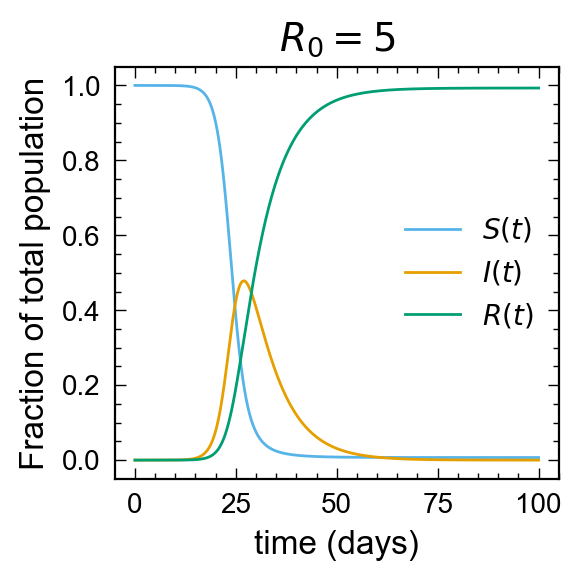

In [39]:
fig, ax = plt.subplots(figsize=(3, 3))

ax.plot(times, s, label='$S(t)$')
ax.plot(times, i, label='$I(t)$')
ax.plot(times, 1 - s - i, label='$R(t)$')

ax.set_xlabel('time (days)')
ax.set_title('$R_0 = ' + str(reprod_num) + '$')
ax.set_ylim(-0.05, 1.05)

ax.set_ylabel('Fraction of total population')
ax.legend()

fig.tight_layout()
plt.show()

# Better numerical integration and the SIR model
___

We stated above the Euler's method employs a first-order Taylor series approximation to solve differential equations. The SIR model is seemingly simple, but it is much more complicated than solving the differential equation for exponential growth. Let's now use `scipy` which has functions to integrate differential equations more accurately. Specifically let's use [scipy.integrate.odeint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html). (We don't concern ourselves with the implementation here. Though for those who are curious, this function uses [multistep methods](https://en.wikipedia.org/wiki/Linear_multistep_method#Families_of_multistep_methods) whereas Euler's method uses only one step. So this `scipy` function should be more accurate.)

Reading the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html), we see an example that is illuminating and follow it. We need to define a function which outputs an array-like object which contains the derivatives.

### Write a function which computes $dS(t)/dt$ and $dI(t)/dt$.

It should have as its parameters
- `current_vals`, a list containing the current values of $S$ and $I$, i.e., $[S, I]$
- `T`, a sequence of time points
- `beta`, the rate at which a susceptible person meeting an infected individual becomes infected
- `nu`, the rate at which infected individuals recover

It should return:
- A list containing $[dS(t)/dt, dI(t)/dt]$

In [12]:
def sir_ode(current_vals, T, beta, nu):
    s, i = current_vals
    
    """
    Compute ds/dt.
    """
    ds_dt = -beta * s * i
    
    """
    Compute di/dt.
    """
    di_dt = -ds_dt - nu * i
    
    return np.array([ds_dt, di_dt])

Run the scipy ode integrator using your function, obtaining trajectories for $S$ and $I$ using the following parameters:
- $I(0) = 10^{-6}$
- $S(0) = 1 - I(0)$
- $\nu = \frac{1}{7}$ (recovery after a week)
- $R_0 = 5$ (average number of infections per individual)
- $T$ = `np.arange(0, 101, 100)`

In [37]:
i0 = 1e-6
s0 = 1 - i0
nu = 1 / 7
reprod_num = 5
T = np.arange(0, 101, 1) 

"""
Look at the documentation for odeint and run it correctly
using the sir_ode. Figure out what else you need to run it
by looking at the shown example.
https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html
"""
scipy_result = odeint(sir_ode, [s0, i0], T, args=(reprod_num * nu, nu))

Plot the solutions from your implentation of the Euler method as a scatter, and plot the solutions from `scipy` as solid lines. When plotting the results from using the Euler method, plot every 100th point since we had $\Delta t = 0.01$. Set the size of the markers of the scatter to be 5: `s=5`. Label all plotted objects. Because we now have six plotted objects, the legend is large. We move the legend outside the axes: `plt.legend(loc='center right', bbox_to_anchor=(1.6, 0.5))`.

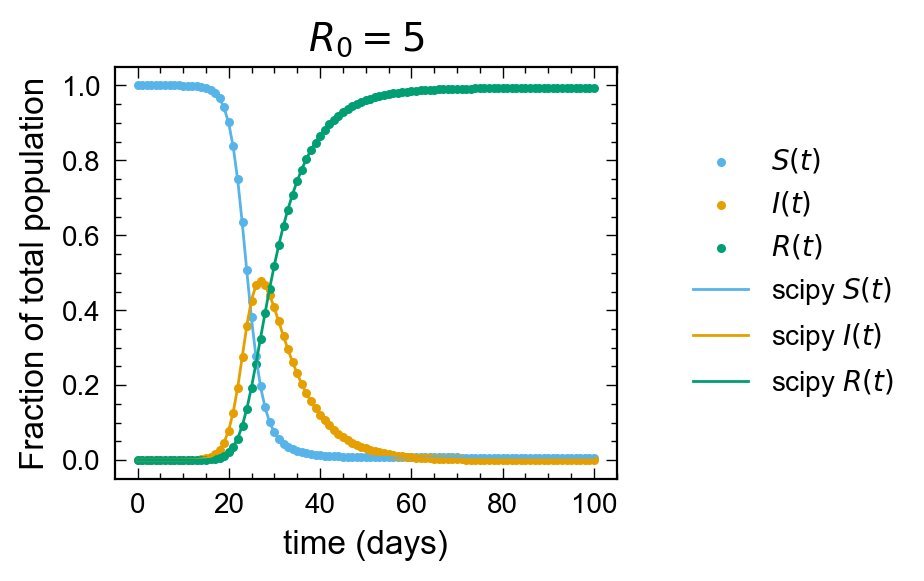

In [24]:
fig, ax = plt.subplots(figsize=(6, 3))

euler_spacing = int(1 / dt)

ax.scatter(times[::euler_spacing], s[::euler_spacing], label='$S(t)$', s=5)
ax.scatter(times[::euler_spacing], i[::euler_spacing], label='$I(t)$', s=5)
ax.scatter(times[::euler_spacing], (1 - s - i)[::euler_spacing], label='$R(t)$', s=5)

ax.plot(T, scipy_result[:, 0], label='scipy $S(t)$')
ax.plot(T, scipy_result[:, 1], label='scipy $I(t)$')
ax.plot(T, 1 - scipy_result[:, 0] - scipy_result[:, 1], label='scipy $R(t)$')

ax.set_xlabel('time (days)')
ax.set_title('$R_0 = ' + str(reprod_num) + '$')
ax.set_ylim(-0.05, 1.05)

ax.set_ylabel('Fraction of total population')
ax.legend(loc='center right', bbox_to_anchor=(1.6, 0.5))

fig.tight_layout()
plt.show()

We see that, at least for this choice of parameters, Euler's method produces an approximation which matches the results given by the `scipy` integrator (at least visually).